# Assignment 17: Support Vector Machine (SVM)

## Dataset: Mushroom Classification

**Objective:** Classify mushrooms as edible or poisonous using SVM.

**Topics Covered:**
- SVM Classifier
- Different Kernels (Linear, RBF, Polynomial)
- Hyperparameter Tuning
- Model Comparison

---
## Step 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('datasets/mushroom.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (8124, 13)

First 5 rows:


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_height,cap_diameter
0,e,f,f,y,f,p,n,c,b,b,e,6.55,12.70
1,p,x,f,c,t,a,f,d,b,b,t,12.39,13.48
2,p,b,f,g,t,m,d,c,b,p,t,10.59,7.40
3,e,x,f,g,t,n,f,d,b,o,e,4.83,10.45
4,p,f,y,w,f,c,d,w,n,n,e,15.16,9.05


---
## Step 2: Exploratory Data Analysis

In [2]:
# Check data info
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum().sum())

=== Data Types ===
class               object
cap_shape           object
cap_surface         object
cap_color           object
bruises             object
odor                object
gill_attachment     object
gill_spacing        object
gill_size           object
gill_color          object
stalk_shape         object
stalk_height       float64
cap_diameter       float64
dtype: object

=== Missing Values ===
0


=== Class Distribution ===
class
p    4103
e    4021
Name: count, dtype: int64


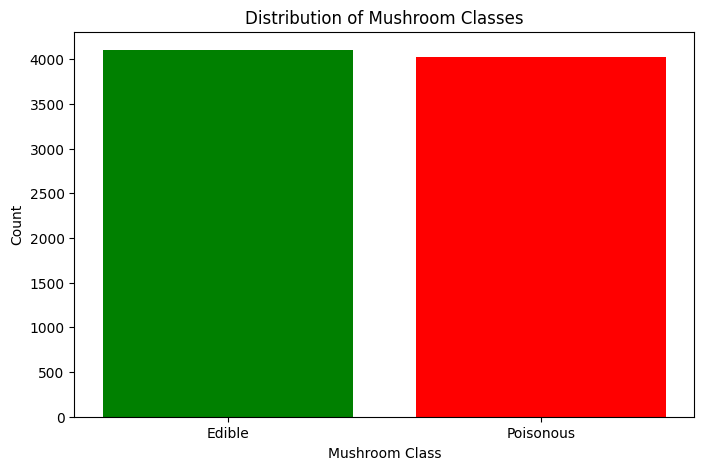

In [3]:
# Target distribution
print("=== Class Distribution ===")
class_counts = df['class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 5))
plt.bar(['Edible', 'Poisonous'], class_counts.values, color=['green', 'red'])
plt.xlabel('Mushroom Class')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Classes')
plt.show()

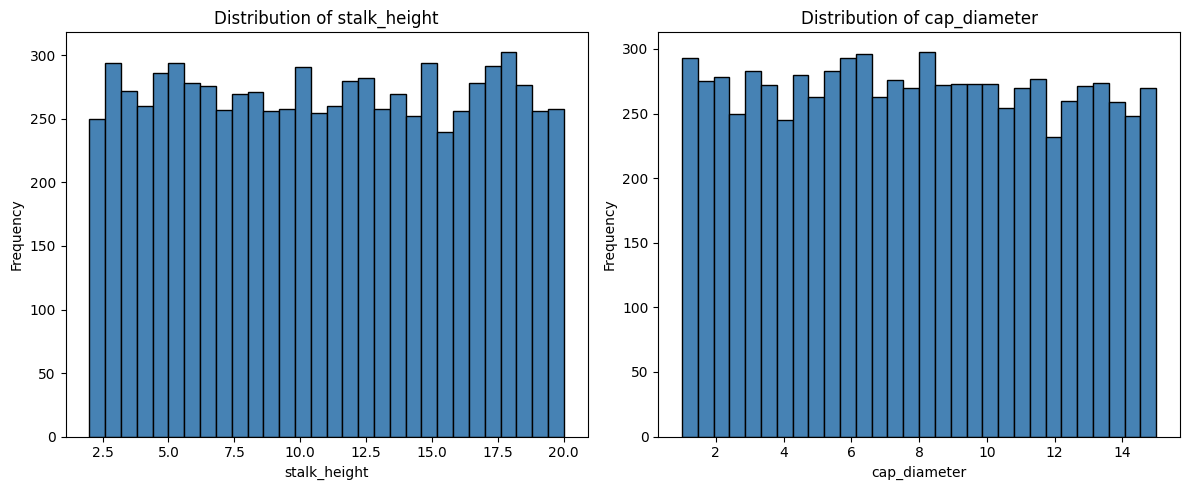

In [4]:
# Numerical columns distribution
numerical_cols = ['stalk_height', 'cap_diameter']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title('Distribution of ' + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

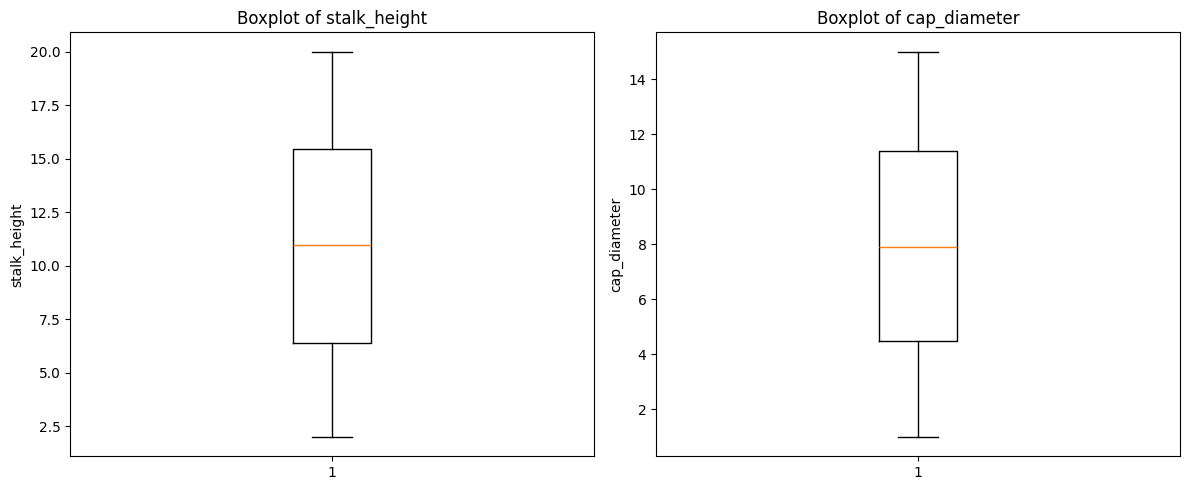

In [5]:
# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title('Boxplot of ' + col)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

---
## Step 3: Data Preprocessing

In [6]:
# Drop unnamed column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('class')  # Remove target

print("Categorical columns:", len(categorical_cols))
print("Numerical columns:", len(numerical_cols))

Categorical columns: 10
Numerical columns: 2


In [7]:
# Encode categorical variables
print("=== Encoding Categorical Variables ===")

df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Encode target
le_target = LabelEncoder()
df_encoded['class'] = le_target.fit_transform(df_encoded['class'])
print("Target encoding: edible=0, poisonous=1")

print("\nEncoding complete!")
df_encoded.head()

=== Encoding Categorical Variables ===
Target encoding: edible=0, poisonous=1

Encoding complete!


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_height,cap_diameter
0,0,2,0,9,0,6,3,0,0,0,0,6.55,12.70
1,1,5,0,1,1,0,2,1,0,0,1,12.39,13.48
2,1,0,0,3,1,4,1,0,0,7,1,10.59,7.40
3,0,5,0,3,1,5,2,1,0,6,0,4.83,10.45
4,1,2,3,8,0,1,1,2,1,5,0,15.16,9.05


In [8]:
# Prepare features and target
feature_cols = [col for col in df_encoded.columns if col != 'class']

X = df_encoded[feature_cols]
y = df_encoded['class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (8124, 12)
Target shape: (8124,)


In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 6499
Testing set: 1625


In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled!")

Features scaled!


---
## Step 4: SVM Implementation

In [11]:
# Train SVM with default parameters (RBF kernel)
print("=== Training SVM Model (RBF Kernel) ===")

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predict
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf)
recall = recall_score(y_test, y_pred_rbf)
f1 = f1_score(y_test, y_pred_rbf)

print("\nRBF Kernel Results:")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))

=== Training SVM Model (RBF Kernel) ===

RBF Kernel Results:
Accuracy: 0.4997
Precision: 0.5149
Recall: 0.5364
F1-Score: 0.5254


=== Confusion Matrix ===


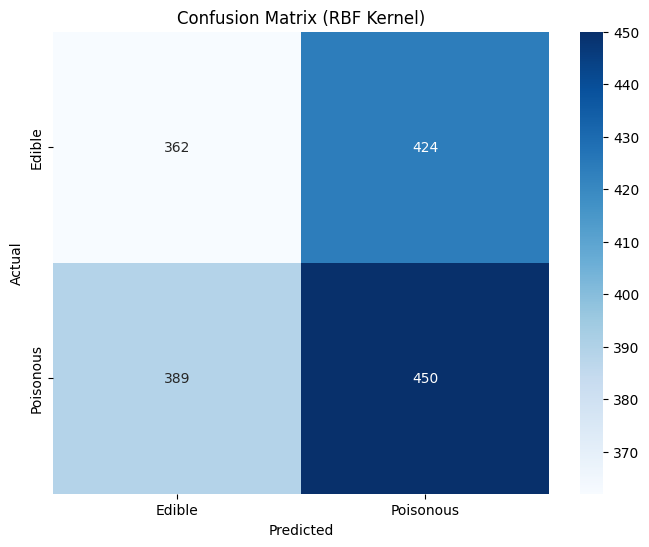

In [12]:
# Confusion Matrix
print("=== Confusion Matrix ===")

cm = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

---
## Step 5: Compare Different Kernels

In [13]:
# Compare different kernels
print("=== Comparing SVM Kernels ===")

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = []

for kernel in kernels:
    print("\nTraining with", kernel, "kernel...")
    
    # Train model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)
    
    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1_val
    })
    
    print("  Accuracy:", round(acc, 4))

# Create comparison dataframe
results_df = pd.DataFrame(results)
print("\n=== Kernel Comparison ===")
results_df

=== Comparing SVM Kernels ===

Training with linear kernel...
  Accuracy: 0.4911

Training with rbf kernel...
  Accuracy: 0.4997

Training with poly kernel...
  Accuracy: 0.5237

Training with sigmoid kernel...
  Accuracy: 0.4923

=== Kernel Comparison ===


,Kernel,Accuracy,Precision,Recall,F1-Score
0,linear,0.491077,0.507389,0.491061,0.499091
1,rbf,0.499692,0.514874,0.536353,0.525394
2,poly,0.523692,0.538644,0.539928,0.539286
3,sigmoid,0.492308,0.508663,0.489869,0.499089


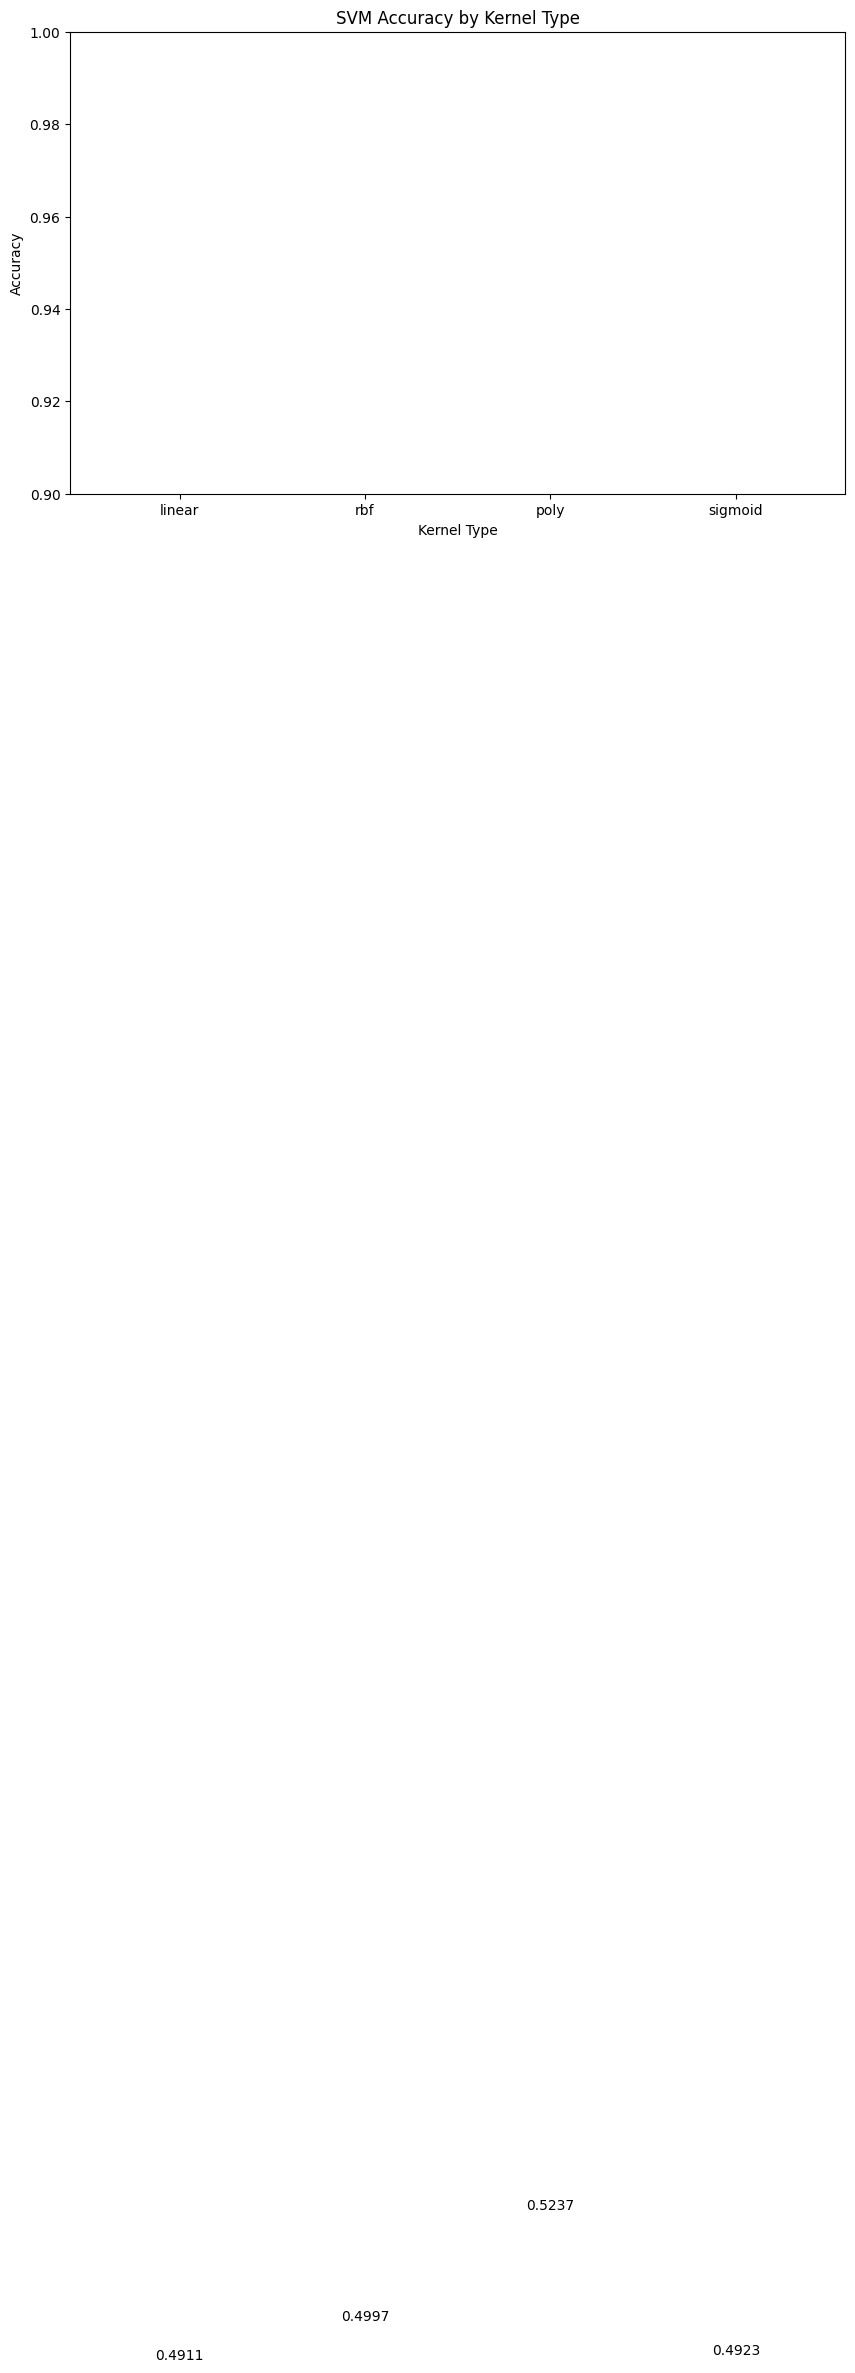

In [14]:
# Plot kernel comparison
plt.figure(figsize=(10, 6))
x_pos = range(len(kernels))
plt.bar(x_pos, results_df['Accuracy'], color='steelblue', edgecolor='black')
plt.xticks(x_pos, results_df['Kernel'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy by Kernel Type')
plt.ylim(0.9, 1.0)

for i in range(len(results_df)):
    plt.text(i, results_df['Accuracy'].iloc[i] + 0.005, 
             str(round(results_df['Accuracy'].iloc[i], 4)), ha='center')

plt.show()

---
## Step 6: Hyperparameter Tuning

In [15]:
# Hyperparameter tuning for RBF kernel
print("=== Hyperparameter Tuning (RBF Kernel) ===")

C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 'auto', 0.1, 1]

best_accuracy = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train_scaled, y_train)
        y_pred = svm_model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {'C': C, 'gamma': gamma}

print("\nBest Parameters:")
print("  C:", best_params['C'])
print("  gamma:", best_params['gamma'])
print("  Best Accuracy:", round(best_accuracy, 4))

=== Hyperparameter Tuning (RBF Kernel) ===

Best Parameters:
  C: 0.1
  gamma: 1
  Best Accuracy: 0.5163


In [16]:
# Train final model with best parameters
print("=== Training Final Model ===")

final_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
final_svm.fit(X_train_scaled, y_train)

y_pred_final = final_svm.predict(X_test_scaled)

print("\n=== Final Model Evaluation ===")
print(classification_report(y_test, y_pred_final, target_names=['Edible', 'Poisonous']))

=== Training Final Model ===

=== Final Model Evaluation ===
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       786
   Poisonous       0.52      1.00      0.68       839

    accuracy                           0.52      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.27      0.52      0.35      1625



c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

---
## Step 7: Analysis and Discussion

### SVM Strengths:
1. **Effective in high-dimensional spaces** - Works well even when features > samples
2. **Memory efficient** - Uses only support vectors for decision function
3. **Versatile** - Different kernels for different data types

### SVM Weaknesses:
1. **Computationally expensive** for large datasets
2. **Sensitive to feature scaling** - Requires normalization
3. **Difficult to interpret** - Black-box model

### Practical Implications:
- SVM is excellent for binary classification like mushroom edibility
- RBF kernel is good default for non-linear data
- Hyperparameter tuning (C, gamma) significantly impacts performance

---
## Summary

In this assignment, we:

1. **Explored** the Mushroom dataset
2. **Preprocessed** data with label encoding and scaling
3. **Implemented** SVM with multiple kernels
4. **Compared** Linear, RBF, Polynomial, and Sigmoid kernels
5. **Tuned** hyperparameters C and gamma
6. **Analyzed** SVM strengths and weaknesses